# <center>Metody Numeryczne</center>

# Laboratorium 9: Interpolacja


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem laboratorium jest praktyczne zapoznanie z zagadnieniem interpolacji wielomianowej, ze szczególnym uwzględnieniem jej wariantów numerycznie stabilnych. W ramach zajęć przeanalizowane zostanie działanie interpolacji barycentrycznej opartej na węzłach Czebyszewa.


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

---

### **Zadanie 1.**

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor [węzłów Czebyszewa](https://en.wikipedia.org/wiki/Chebyshev_nodes) drugiego rodzaju (funkcja *`chebyshev_nodes()`*) dany wzorem:
  
$$
x_k = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
$$

oraz wagi barycentryczne dla tego typu wezłów (funkcja *`bar_cheb_weights()`*):

$$
\begin{align*}
    w_j={}&(-1)^j\delta_j\\
    \delta_j={}&
    \begin{cases}
        \frac{1}{2}, \quad j=\{0, n\}\\
        1, \quad j\in(0,n)
    \end{cases}
\end{align*}
$$


---

### **Zadanie 2.**

Zaimplementuj podane funkcje, które będą używane w dalszej części laboratorium:

1. Ciągłą nieróżniczkowalną: $f_1(x) = \mathrm{sgn}(x)x+x^2$.

2. Różniczkowalną jednokrotnie: $f_2(x) = \mathrm{sgn}(x)x^{2}$.

3. Różniczkowalną trzykrotnie: $f_3(x)=|\sin(5 x)|^3$.

4. Trzy analityczne postaci: $f_{4a}(x) = \cfrac{1}{1+ax^2} \ $ dla $a \in \{1,25,100\}$. 

5. Nieciągłą: $f_5(x) = \mathrm{sgn}(x)$.

Funkcje można zaimplementować w notebooku lub w pliku `main.py`. 

>**Wskazówka:** Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).
>
>$\mathrm{sgn}(x)$ to funkcja [signum](https://en.wikipedia.org/wiki/Sign_function).

In [2]:

f1 = lambda x: np.sign(x)*x + x**2
f2 = lambda x: np.sign(x)*(x**2)
f3 = lambda x: (abs(np.sin(5*x)))**3
f41 = lambda x: 1/(1+x**2)
f425 = lambda x: 1/(1+25*(x**2))
f4100 = lambda x: 1/(1+100*(x**2))
f5 = lambda x: np.sign(x)

---

### **Zadanie 3.**

Do oceny jakości interpolacji stosuje się normę wektorową $\ell_{\infty}$. Dla różnicy wektorów definiujemy ją jako:  
  
$$
\ell_{\infty} = ||\mathbf{x_1}-\mathbf{x_2}||_\infty = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}
$$  
  
Zaimplementuj funkcję *`L_inf()`* wyznaczającą normę $\ell_{\infty}$. 


---

### **Zadanie 4.**

**Punkt 1.**

Zaimlementuj wzór barycentryczny podany na wykładzie jako funkcję *`barycentric_inte()`*.

<br>

**Punkt 2.**

Dla funkcji ciągłej nieróżniczkowalnej z **Zadania 2.** ($f_1(x)$) przeprowadź interpolację metodą [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji [`sp.interpolate.barycentric_interpolate()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.barycentric_interpolate.html) jak i korzystając z zaimplementowanego wzoru barycentrycznego. 

W tym celu dla $n \in \{1, 2, 3, 4, 5\}$:

1. W węzłach Czebyszewa wykonaj interpolację rzędu $10^n$.

2. Wykreśl wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w $1000$ punktach).

3. Zbadaj jakość interpolacji za pomocą normy $\ell_{\infty}$.

Opisz jak zmieniały się wartość normy $\ell_{\infty}$ oraz czas obliczeń w zależności od rzędu interpolacji.


Czas dla inetrpolacji metodą z biblioteki sp dla n = 10, wynosi t = 0.00068 s
Jakość normy dla interpolacji metodą z biblioteki sp: 0.11011227778498284
Czas dla inetrpolacji metodą zaimplementowaną samodzielnie dla n = 10, wynosi t = 0.01746 s
Jakość normy dla interpolacji metodą zaimplementowaną samodzielnie: 0.11011227778498282


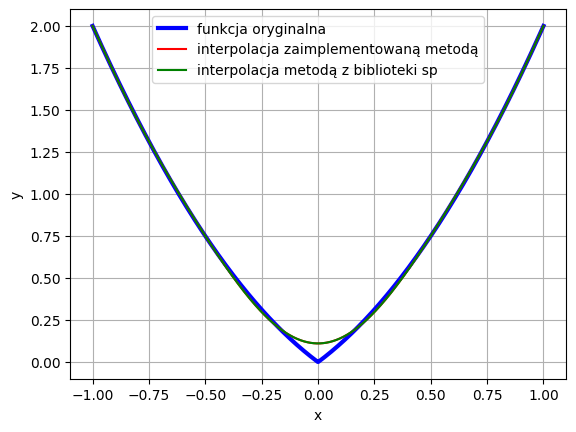

Czas dla inetrpolacji metodą z biblioteki sp dla n = 100, wynosi t = 0.00198 s
Jakość normy dla interpolacji metodą z biblioteki sp: 0.009124053856609088
Czas dla inetrpolacji metodą zaimplementowaną samodzielnie dla n = 100, wynosi t = 0.01645 s
Jakość normy dla interpolacji metodą zaimplementowaną samodzielnie: 0.009124053856609072


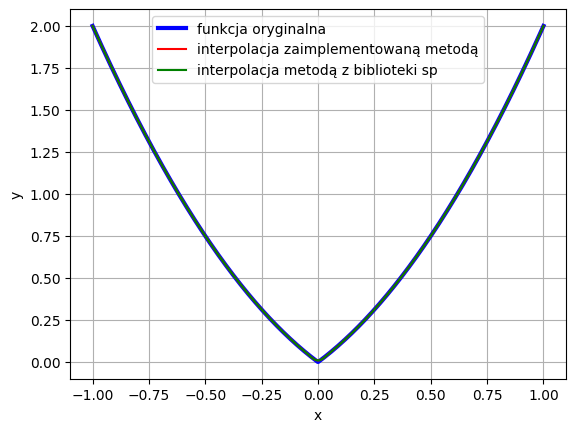

Czas dla inetrpolacji metodą z biblioteki sp dla n = 1000, wynosi t = 0.02169 s
Jakość normy dla interpolacji metodą z biblioteki sp: 0.00023808283885499429
Czas dla inetrpolacji metodą zaimplementowaną samodzielnie dla n = 1000, wynosi t = 0.04307 s
Jakość normy dla interpolacji metodą zaimplementowaną samodzielnie: 0.00023808283885475554


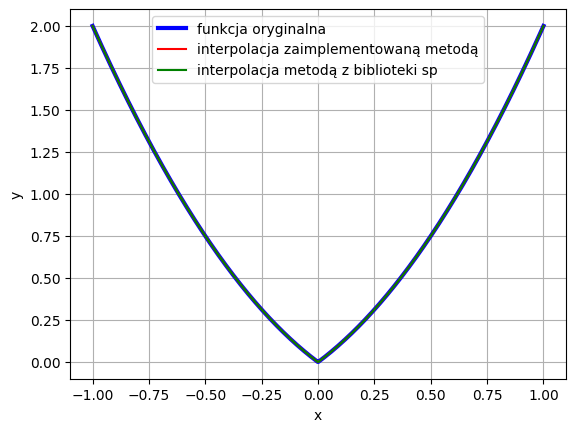

Czas dla inetrpolacji metodą z biblioteki sp dla n = 10000, wynosi t = 0.46050 s
Jakość normy dla interpolacji metodą z biblioteki sp: 1.8533453682908346e-06
Czas dla inetrpolacji metodą zaimplementowaną samodzielnie dla n = 10000, wynosi t = 0.49894 s
Jakość normy dla interpolacji metodą zaimplementowaną samodzielnie: 1.853345368676377e-06


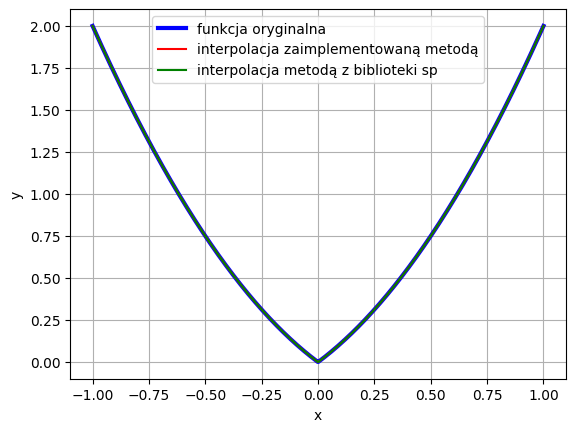

Czas dla inetrpolacji metodą z biblioteki sp dla n = 100000, wynosi t = 31.87081 s
Jakość normy dla interpolacji metodą z biblioteki sp: 2.2337216690031247e-09
Czas dla inetrpolacji metodą zaimplementowaną samodzielnie dla n = 100000, wynosi t = 32.10767 s
Jakość normy dla interpolacji metodą zaimplementowaną samodzielnie: 2.2337183201194544e-09


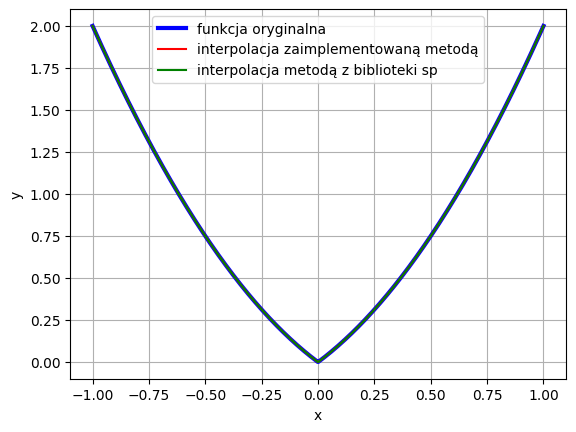

In [11]:
import time
x = np.linspace(-1, 1, 1000)
ns = [1, 2, 3, 4, 5]
for n in ns:
    nodes = (10**n)
    w = main.bar_cheb_weights(nodes)
    xch = main.chebyshev_nodes(nodes)
    start_time = time.time()
    ysp = sp.interpolate.barycentric_interpolate(xch, f1(xch), x)
    stop_time = time.time()
    times = stop_time - start_time
    print(f'Czas dla inetrpolacji metodą z biblioteki sp dla n = {nodes}, wynosi t = {times:.5f} s')
    print(f'Jakość normy dla interpolacji metodą z biblioteki sp: {main.L_inf(f1(x),ysp)}')
    tart_time = time.time()
    yimp = main.barycentric_inte(xch, f1(xch), w, x)
    stop_time = time.time()
    times = stop_time - start_time
    print(f'Czas dla inetrpolacji metodą zaimplementowaną samodzielnie dla n = {nodes}, wynosi t = {times:.5f} s')
    print(f'Jakość normy dla interpolacji metodą zaimplementowaną samodzielnie: {main.L_inf(f1(x),yimp)}')
    times = stop_time - start_time
    plt.plot(x, f1(x), 'b', linewidth=3, label="funkcja oryginalna")
    plt.plot(x, yimp, 'r', label='interpolacja zaimplementowaną metodą')
    plt.plot(x, ysp, 'g', label='interpolacja metodą z biblioteki sp')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc=0)
    plt.grid()
    plt.show()

Zadanie polegało na zaimplementowaniu wzoru barycentrycznego do interpolacji wielomianowej jako funkcji barycentric_inte(). Następnie przeprowadzono interpolację funkcji ciągłej, lecz nieróżniczkowalnej f1(x), zarówno przy użyciu własnej implementacji, jak i funkcji sp.interpolate.barycentric_interpolate() z biblioteki SciPy. Dla kolejnych rzędów interpolacji 10**n n∈{1,2,3,4,5}, wyznaczono węzły Czebyszewa i wykonano interpolację w 1000 punktach równomiernie rozłożonych. Na podstawie wyników obliczono normę 
ℓ
∞
dla oceny jakości interpolacji oraz zmierzono czas potrzebny do wykonania obliczeń dla obu metod. W efekcie można było porównać dokładność i efektywność obydwu metod interpolacji oraz zobaczyć, jak zwiększanie rzędu interpolacji wpływa na normę błędu i czas obliczeń.

 

---

### **Zadanie 5.**

Dla funkcji jednokrotnie ($f_2(x)$) i trzykrotnie ($f_3(x)$) różniczkowalnych z **Zadania 2.** należy przeanalizować w pętli jakość interpolacji dla interpolacji rzędu $10^n$, gdzie $n \in \{1, 2, 3, 4, 5\}$. 

W tym celu:

1. Wylicz wartość funkcji i wielomianu interpolacyjnego w $1000$ punktów (nie będącymi węzłami interpolacji np. punkty równoodległe).

2. Wylicz normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.

3. Dla każdej z funkcji sporządź wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.

4. Dla porównania umieść na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

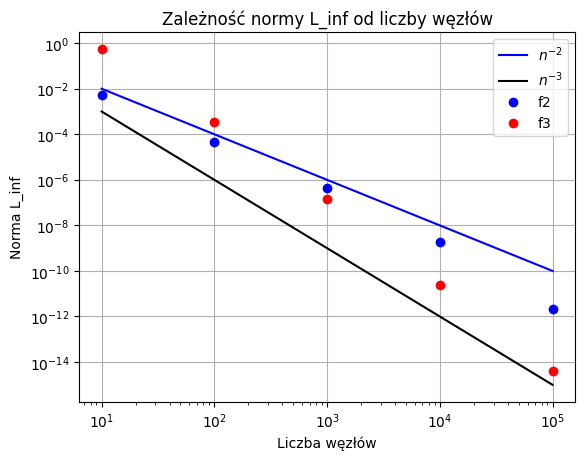

In [ ]:
# ===== Twoja implementacja tutaj =====
x = np.linspace(-1, 1, 1000)
n_val = [1,2,3,4,5]
normy_f2 = []
normy_f3 = []
nodes = []
n_vf2 = []
n_vf3 = []
for i in n_val:
    node = int(10**i)
    
    n_vf2.append(node**(-2))
    n_vf3.append(node**(-3))
    
    nodes.append(node)
    
    xch = main.chebyshev_nodes(node)
    w = main.bar_cheb_weights(node)
    
    yint_f2 = main.barycentric_inte(xch, f2(xch), w, x)
    yint_f3 = main.barycentric_inte(xch, f3(xch), w, x)
    
    norm_f2 = main.L_inf(f2(x), yint_f2)
    norm_f3 = main.L_inf(f3(x), yint_f3)
    
    normy_f2.append(norm_f2)
    normy_f3.append(norm_f3)

plt.plot(nodes, n_vf2, 'b-', label=r'$n^{-2}$')
plt.plot(nodes, n_vf3, 'k-', label=r'$n^{-3}$')    
plt.plot(nodes, normy_f2, 'bo', label='f2')
plt.plot(nodes, normy_f3, 'ro', label='f3')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Liczba węzłów')
plt.ylabel('Norma L_inf')
plt.title('Zależność normy L_inf od liczby węzłów')
plt.legend()
plt.grid()
plt.show()

Zadanie polegało na analizie jakości interpolacji dla funkcji jednokrotnie różniczkowalnej f2(x) i trzykrotnie różniczkowalnejf3(x). Dla kolejnych rzędów interpolacji , wyznaczono węzły Czebyszewa i wyliczono wartości funkcji oraz odpowiadającego jej wielomianu interpolacyjnego w 1000 punktach równomiernie rozłożonych. Następnie obliczono normę różnicy między wartościami funkcji a wielomianu, aby ocenić jakość interpolacji dla każdego rzędu. Wyniki przedstawiono na wykresie w skali podwójnie logarytmicznej, gdzie oś X odpowiada liczbie węzłów, a oś Y wartości normy błędu. Dodatkowo naniesiono krzywe porównawcze, aby zobaczyć zależność normy błędu od liczby węzłów względem rzędu najwyższej pochodnej funkcji.


---

### **Zadanie 6.**

Dla funkcji nieciągłej z **Zadania 2.** ($f_5(x)$) przeanalizować należy [efekt Gibbsa](https://en.wikipedia.org/wiki/Gibbs_phenomenon).

1. Oddzielnie dla parzystych i nieparzystych $n$ wylicz jaki jest minimalny błąd niezależny od rzędu. 

2. Odpowiedz dlaczego wartości dla parzystych i nieparzystych $n$ się różnią.

> **Wskazówka:** Wykonaj wykres funkcji i jej funkcji interpolującej.

Minimalny błąd dla n parzystych: 0.93092
Minimalny błąd dla n nieparzystych: 1.95701


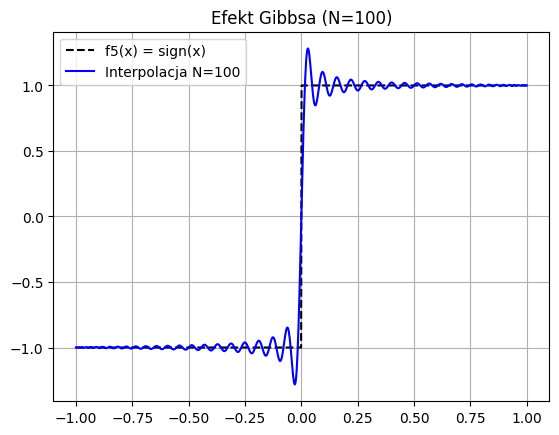

In [ ]:
# ===== Twoja implementacja tutaj =====
x = np.linspace(-1, 1, 1000)
errors_p = []
errors_np = []

for i in range(20,100):
    nodes = int(i)
    xch = main.chebyshev_nodes(nodes)
    w = main.bar_cheb_weights(nodes)
    yint = main.barycentric_inte(xch, f5(xch), w, x)
    error = main.L_inf(f5(x), yint)
    if nodes % 2 == 0:
        errors_p.append(error)
    else:
        errors_np.append(error)

srednia_parzyste = np.mean(errors_p[-5:])
srednia_nieparzyste = np.mean(errors_np[-5:])

print(f"Minimalny błąd dla n parzystych: {srednia_parzyste:.5f}")
print(f"Minimalny błąd dla n nieparzystych: {srednia_nieparzyste:.5f}")



nodes = main.chebyshev_nodes(100)
weights = main.bar_cheb_weights(100)
y_interp = main.barycentric_inte(nodes, f5(nodes), weights, x)

plt.plot(x, f5(x), 'k--', label='f5(x) = sign(x)')
plt.plot(x, y_interp, 'b-', label=f'Interpolacja N=100')
plt.title(f"Efekt Gibbsa (N=100)")
plt.legend()
plt.grid()
plt.show()

Zadanie 6 polegało na analizie efektu Gibbsa dla funkcji nieciągłej f5(x). Dla kolejnych liczb węzłów n∈[20,99] obliczono interpolację barycentryczną w węzłach Czebyszewa, a następnie wyznaczono normę różnicy między funkcją oryginalną a jej interpolacją. Wyniki analizowano oddzielnie dla parzystych i nieparzystych liczb węzłów, a z ostatnich pięciu wartości obliczono średni minimalny błąd dla każdej grupy. Następnie wykonano wykres interpolacji dla N=100, aby zobaczyć charakterystyczne oscylacje w pobliżu punktu nieciągłości (efekt Gibbsa). Różnica między wynikami dla n parzystych i nieparzystych wynika z położenia węzłów Czebyszewa względem punktu nieciągłości: węzły parzyste nie zawierają punktu x=0, co powoduje większą oscylację, natomiast węzły nieparzyste zawierają punkt nieciągły, dzięki czemu interpolacja minimalizuje maksymalny błąd.

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)